In [20]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy_financial as npf
from pandas import Series, DataFrame

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" )

pd.set_option('display.max_rows', 15)

Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.4
NumPy 1.21.5


In [2]:
#dataset 01
data_01_01 = pd.read_csv('01_CO2_Emission_Sector.csv') #by กระทรวงพลังงาน
data_01_01 = data_01_01.fillna(0)
data_01_02 = pd.read_csv('01_CO2_Emission_kWh.csv', index_col = 'Year', parse_dates = True) #by กระทรวงพลังงาน

display(data_01_01)
data_01_01.Year = data_01_01.Year.astype('object')
#data_01_01.info() 
display(data_01_02)
#data_01_02.info()


,Year,Sector,Oil,Coal/Lignite,Natural Gas,Total
0,1987,Power Generation,1836.62,6600.14,8054.83,16491.59
1,1987,Transport,18092.01,0.00,0.00,18092.01
2,1987,Industry,5457.13,2940.06,95.12,8492.31
3,1987,Other,6766.42,0.00,0.00,6766.42
4,1988,Power Generation,2519.81,6230.91,9629.29,18380.02
...,...,...,...,...,...,...
139,2021,Other,12648.55,0.00,0.00,12648.55
140,2022,Power Generation,566.73,35551.81,51801.30,87919.84
141,2022,Transport,76974.45,0.00,2598.10,79572.55
142,2022,Industry,12557.62,34209.48,19678.51,66445.60


,CO2
Year,
1997-01-01,0.656
1998-01-01,0.636
1999-01-01,0.646
2000-01-01,0.634
2001-01-01,0.604
...,...
2018-01-01,0.459
2019-01-01,0.445
2020-01-01,0.442


,Coal/Lignite,Natural Gas,Oil
Year,,,
1987,2385.0500,2037.4875,8038.0450
1988,2456.0800,2444.1425,9152.3025
1989,2990.9675,2511.8175,10977.3725
1990,4148.4175,2496.6900,13305.3700
1991,4856.2800,3208.8275,14123.8575
...,...,...,...
2018,19641.0675,20624.5650,25592.8325
2019,17515.0975,20934.2275,25911.1875
2020,18699.7975,19168.9375,24078.1275


<AxesSubplot:title={'center':'CO2 By Fuel'}, xlabel='Year', ylabel='1000 Tons'>

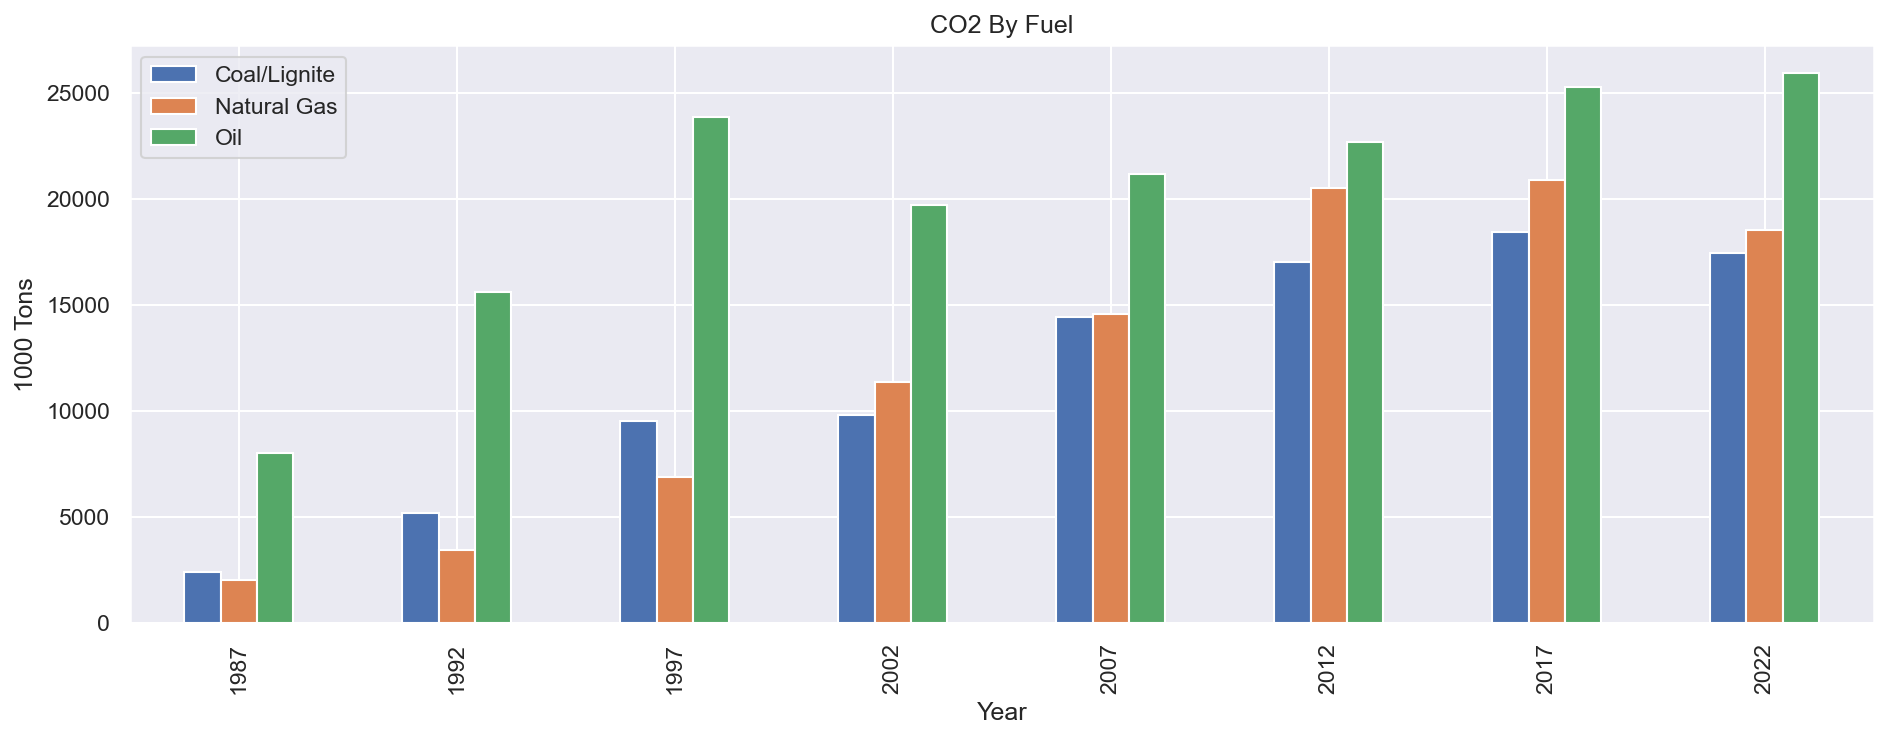

In [88]:
%matplotlib inline
df_res = data_01_01.pivot_table(index = ['Year'], values = ['Oil', 'Natural Gas', 'Coal/Lignite'])
display(df_res)

plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()
df_res.iloc[::5, :].plot( kind='bar', ax=ax,
         title='CO2 By Fuel', ylabel='1000 Tons')

#เพิ่มเติมอัตราการเปลีี่ยนแปลง



,Industry,Other,Power Generation,Transport
Year,,,,
1987,8492.31,6766.42,16491.59,18092.01
1988,9419.31,7363.67,18380.01,21047.11
1989,11802.90,8144.52,20770.80,25202.41
1990,14459.96,8838.44,28149.06,28354.45
1991,16062.15,8965.54,34750.07,28978.10
...,...,...,...,...
2018,78446.76,15902.14,93917.56,75167.40
2019,70438.47,15803.92,94527.97,76671.69
2020,69567.33,13359.38,90983.98,73876.76


<AxesSubplot:title={'center':'CO2 By Activity'}, xlabel='Year', ylabel='1000 Tons'>

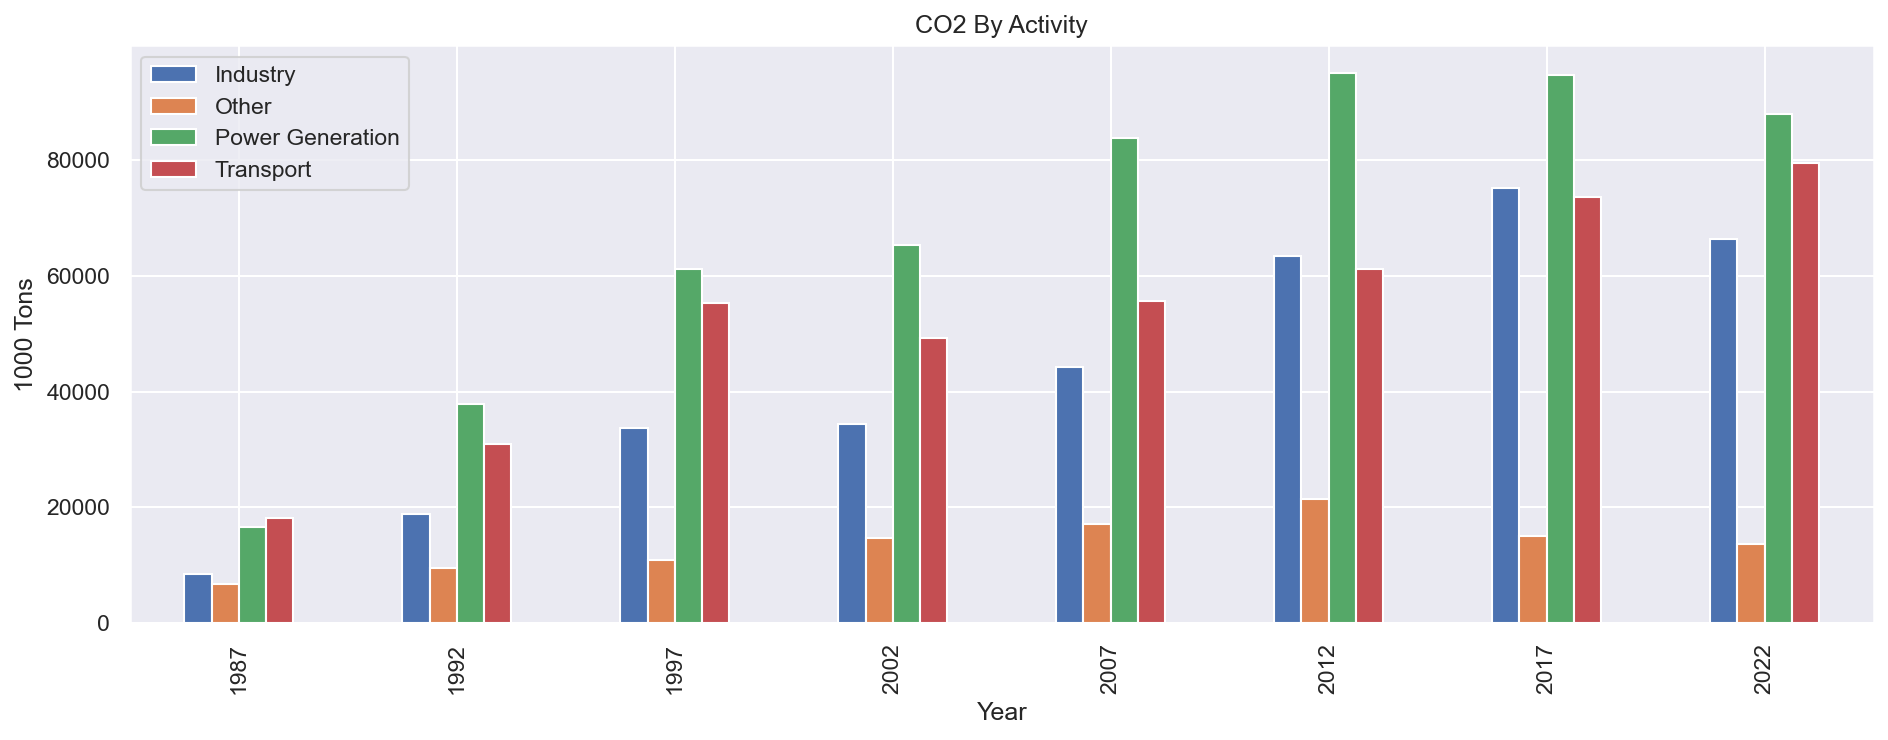

In [96]:
data_01_01['Total_Sector'] = data_01_01.drop('Total', axis =1).apply(lambda q : q['Oil'] + q['Coal/Lignite'] + q['Natural Gas'], axis = 1)
df_sect = data_01_01.loc[: , ['Year','Sector', 'Total_Sector']]
df_sect['Sector'].unique()
df_sect['Sector'] = df_sect.apply(lambda x: x['Sector'].strip(), axis = 1)
df_sect["Power Generation"] = df_sect.apply(lambda a: a["Total_Sector"] if a["Sector"] == "Power Generation" else 0, axis = 1)
df_sect["Transport"] =df_sect.apply(lambda a: a["Total_Sector"] if a["Sector"] == "Transport" else 0, axis = 1)
df_sect["Industry"] = df_sect.apply(lambda a: a["Total_Sector"] if a["Sector"] == "Industry" else 0, axis = 1)
df_sect["Other"] = df_sect.apply(lambda a: a["Total_Sector"] if a["Sector"] == "Other" else 0, axis = 1)
df_sect = df_sect.drop(['Sector', 'Total_Sector'], axis = 1)
df_sect = df_sect.pivot_table(index = ['Year'], values = ['Power Generation', 'Transport', 'Industry', 'Other'], aggfunc = 'sum')
display(df_sect)

plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()
df_sect.iloc[::5, :].plot( kind='bar', ax=ax,
         title='CO2 By Activity', ylabel='1000 Tons' )

<AxesSubplot:title={'center':'kg-CO2/Kwh'}, xlabel='Year'>

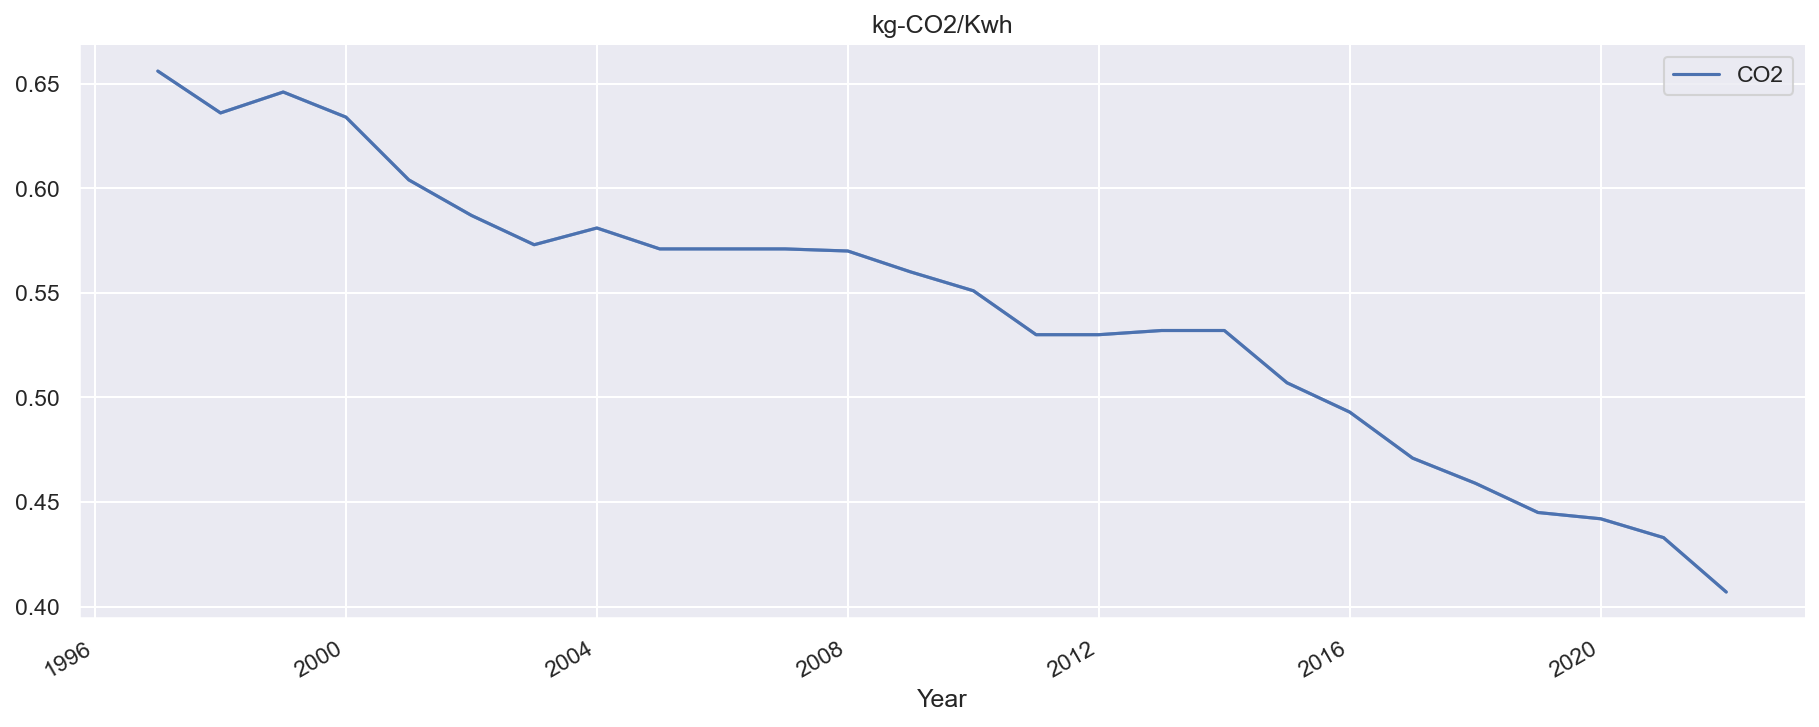

In [103]:
sns.set(rc={'figure.dpi':150})
sns.relplot( kind='line',
             data=data_01_02, 
             x='Year', y='CO2', 
             height=5, aspect=2.5,
             alpha=0.6,)

ax = plt.gca()
data_01_02.plot( kind='line', ax=ax,
         title='kg-CO2/Kwh', ylabel='')

,Year,Coal/Lignite,Natural Gas,Oil,Industry,Other,Power Generation,Transport,CO2
0,1997,9506.0025,6898.3625,23860.0250,33717.83,10862.72,61241.89,55235.12,0.656
1,1998,7659.2025,7349.9850,21353.6975,27774.28,12894.20,58012.24,46770.82,0.636
2,1999,8093.2425,8213.7100,21163.4250,29486.99,13783.16,59694.81,46916.55,0.646
3,2000,8274.8975,9596.3150,19836.7800,29310.33,13502.41,62436.90,45582.33,0.634
4,2001,9202.4625,10392.4775,18791.3625,30383.82,13845.68,62758.81,46556.90,0.604
...,...,...,...,...,...,...,...,...,...
21,2018,19641.0675,20624.5650,25592.8325,78446.76,15902.14,93917.56,75167.40,0.459
22,2019,17515.0975,20934.2275,25911.1875,70438.47,15803.92,94527.97,76671.69,0.445
23,2020,18699.7975,19168.9375,24078.1275,69567.33,13359.38,90983.98,73876.76,0.442
24,2021,19161.8800,19116.9850,22729.9250,71252.66,12648.55,90868.62,69265.33,0.433


,Year,Coal/Lignite,Natural Gas,Oil,Industry,Other,Power Generation,Transport,CO2
0,1997,-1.259501,-1.883628,0.722754,-1.126231,-2.006805,-1.549747,-0.426353,0.656
1,1998,-1.728148,-1.789945,-0.495107,-1.461911,-1.212862,-1.788165,-1.294589,0.636
2,1999,-1.618005,-1.610775,-0.587563,-1.365181,-0.865439,-1.663955,-1.279640,0.646
3,2000,-1.571908,-1.323970,-1.232200,-1.375158,-0.975161,-1.461529,-1.416499,0.634
4,2001,-1.336528,-1.158816,-1.740183,-1.314529,-0.841005,-1.437765,-1.316532,0.604
...,...,...,...,...,...,...,...,...,...
21,2018,1.312387,0.963708,1.564751,1.399973,-0.037299,0.862428,1.618225,0.459
22,2019,0.772898,1.027944,1.719444,0.947680,-0.075685,0.907489,1.772529,0.445
23,2020,1.073529,0.661756,0.828733,0.898480,-1.031060,0.645866,1.485836,0.442
24,2021,1.190787,0.650979,0.173622,0.993664,-1.308867,0.637350,1.012813,0.433


<AxesSubplot:>

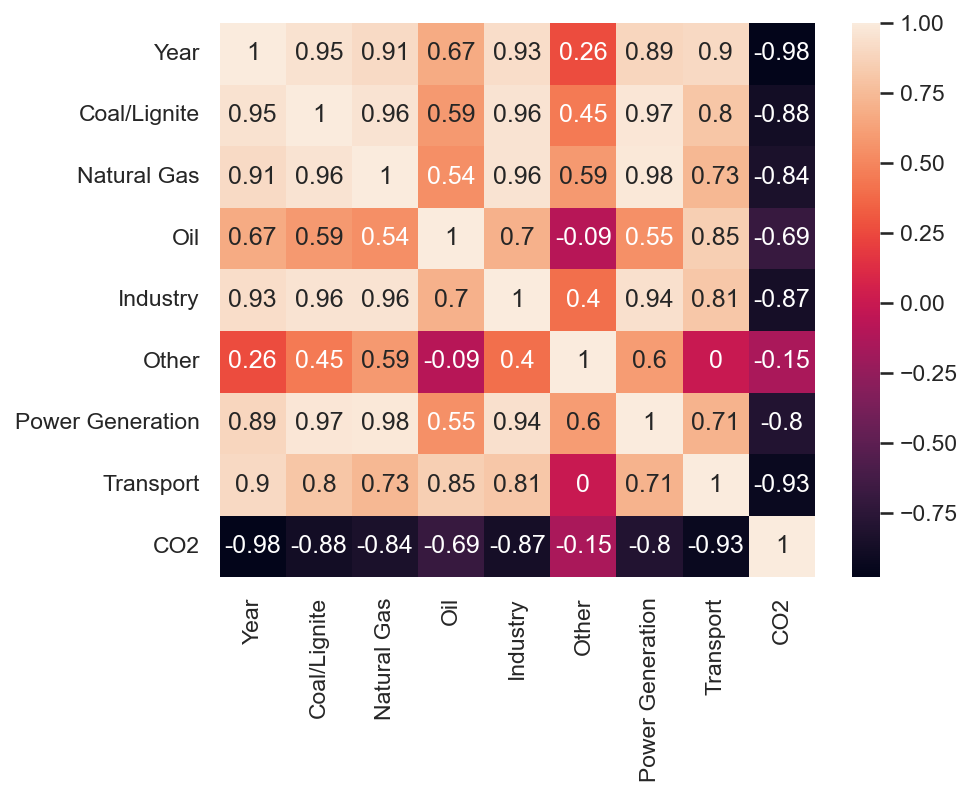

In [6]:
df_res = df_res.reset_index()
df_sect = df_sect.reset_index()
df_co2 = data_01_02.reset_index()
#display(df_res, df_sect, df_co2)

df_merg_co2 = pd.merge(df_res, df_sect, left_on = 'Year', right_on = 'Year').reset_index()
df_merg_co2 = df_merg_co2.iloc[10:,].reset_index().drop('index', axis= 1).drop('level_0', axis = 1)
df_merg_co2['CO2'] = df_co2.CO2
display(df_merg_co2)

#feater scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_co2 = ['Coal/Lignite', 'Natural Gas', 'Oil', 'Power Generation', 'Transport', 'Industry', 'Other']
df_merg_co2[column_co2] = scaler.fit_transform(df_merg_co2[column_co2])
display(df_merg_co2)

corr_CO2 = df_merg_co2.corr().round(2)
sns.heatmap(corr_CO2, annot = True)     #ทำใหม่เอาเฉพาะพลังงาน


In [7]:
#dataset2
data_02_01 = pd.read_csv('02_Province_Oil.csv')
data_02_01['ภาค'].fillna(method='ffill', inplace = True)
data_02_01['จังหวัด'].fillna(method='ffill', inplace = True)
data_02_01.fillna(0, inplace= True) 

#data_02_01 = data_02_01.style.format("{:,.2f}", subset = ['2555', '2556', '2557', '2558', '2559', '2560', \
                                                        #'2561', '2562', '2563', '2564'])
####
#pd.reset_option('display.max_rows')                                     
#display(data_02_01)
#data_02_01.info()

In [8]:
data_02_01 = pd.read_csv('02_Province_elec.csv')
data_02_01['Region'].fillna(method='ffill', inplace = True)
data_02_01['จังหวัด'].fillna(method='ffill', inplace = True)
data_02_01['จำนวนผู้ใช้และการจำหน่าย'].fillna(method='ffill', inplace = True)
data_02_01.dropna(subset = ['ประเภทผู้ใช้'], inplace = True)
data_02_01.fillna(0, inplace= True)

#pdcer['Garbage'] = pdcer.apply(lambda x: count_type(x['Year'], 'gb'), axis = 1 )

display(data_02_01)

,Region,จังหวัด,จำนวนผู้ใช้และการจำหน่าย,ประเภทผู้ใช้,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
0,ภาคกลาง,ภาคกลาง,จำนวนผู้ใช้ไฟฟ้า,จำนวนผู้ใช้ไฟฟ้า,3194167.0,3295382.0,3395367.0,3522038.0,3632722.0,3703312.0,3805840.0,3915613.0,4052963.0,4109479.0
1,ภาคกลาง,ภาคกลาง,จำนวนผู้ใช้ไฟฟ้า,รวมการจำหน่าย,3194167.0,3295382.0,3395367.0,3522038.0,3632722.0,3703312.0,3805840.0,3915613.0,4052963.0,4109479.0
2,ภาคกลาง,ภาคกลาง,จำนวนผู้ใช้ไฟฟ้า,บ้านอยู่อาศัย,2659423.0,2755418.0,2848802.0,2961051.0,3062576.0,3149375.0,3240838.0,3341727.0,3654363.0,3702796.0
3,ภาคกลาง,ภาคกลาง,จำนวนผู้ใช้ไฟฟ้า,กิจการขนาดเล็ก,487247.0,490029.0,495811.0,509086.0,517300.0,500229.0,509477.0,516535.0,340605.0,348349.0
4,ภาคกลาง,ภาคกลาง,จำนวนผู้ใช้ไฟฟ้า,กิจการขนาดกลาง,20931.0,21511.0,21929.0,22167.0,22524.0,22771.0,23314.0,23856.0,24069.0,23765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,ภาคใต้,นราธิวาส,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),สูบน้ำเพื่อการเกษตร,51705.0,72435.0,81281.0,87130.0,103153.0,111695.0,48709.0,80810.0,79522.0,92732.0
2218,ภาคใต้,นราธิวาส,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟชั่วคราว,3594630.0,3048987.0,2873557.0,3007686.0,3349931.0,3228230.0,3618083.0,3557690.0,3373586.0,3953228.0
2219,ภาคใต้,นราธิวาส,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟสำรอง,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2220,ภาคใต้,นราธิวาส,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟที่สามารถงดจ่ายไฟฟ้าได้,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Region,Central,Northeast,North,South
2555,7830734.0,5621956.0,3640992.0,2699992.0
2556,8107521.0,5792208.0,3750177.0,2802169.0
2557,8390343.0,5945052.0,3845268.0,2893307.0
2558,8692789.0,6090067.0,3940336.0,2970199.0
2559,8982367.0,6238441.0,4037643.0,3043440.0
2560,9207396.0,6392571.0,4128148.0,3099258.0
2561,9455665.0,6529550.0,4192548.0,3153552.0
2562,9710003.0,6671017.0,4268677.0,3208683.0
2563,10024857.0,6853770.0,4365303.0,3281423.0
2564,10248225.0,7029429.0,4455876.0,3361232.0


Year,Chonburi,Rayong,Chachoengsao
2555,538034.0,296348.0,204844.0
2556,573825.0,314626.0,212494.0
2557,612280.0,334112.0,219961.0
2558,648605.0,352269.0,227099.0
2559,679851.0,368760.0,234888.0
2560,709768.0,382720.0,243297.0
2561,735862.0,397997.0,250693.0
2562,760948.0,412656.0,258953.0
2563,788438.0,429701.0,267934.0
2564,810142.0,449760.0,276863.0


<AxesSubplot:title={'center':'Rayong'}>

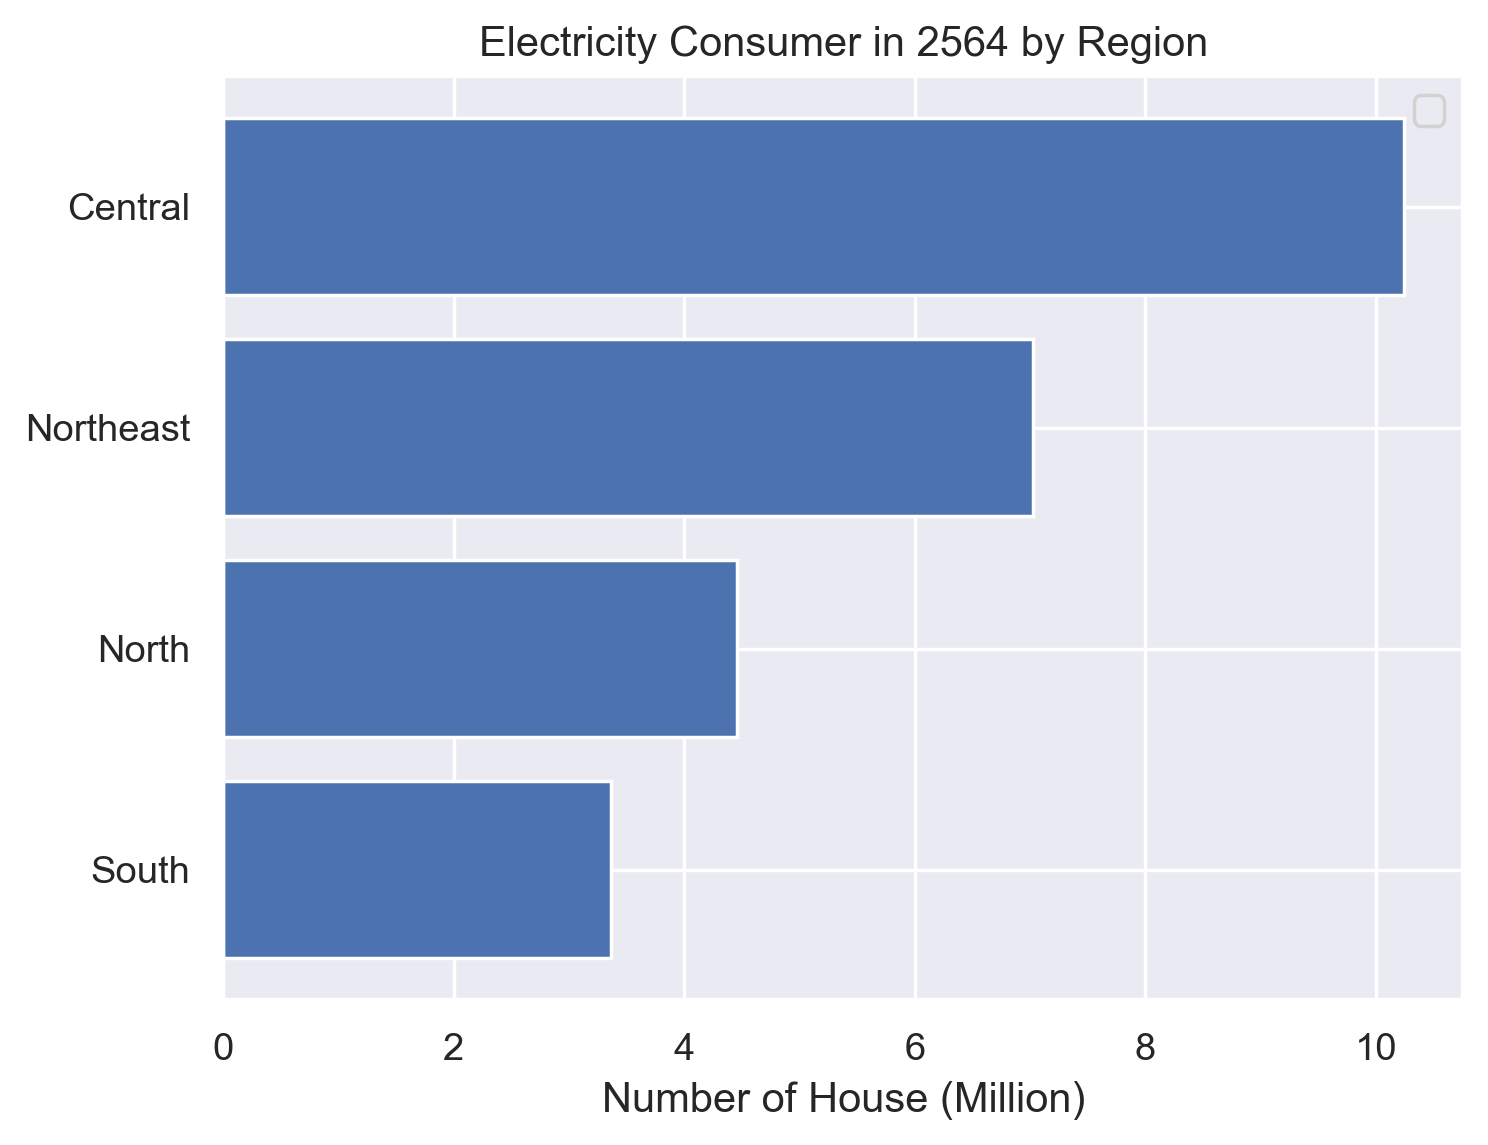

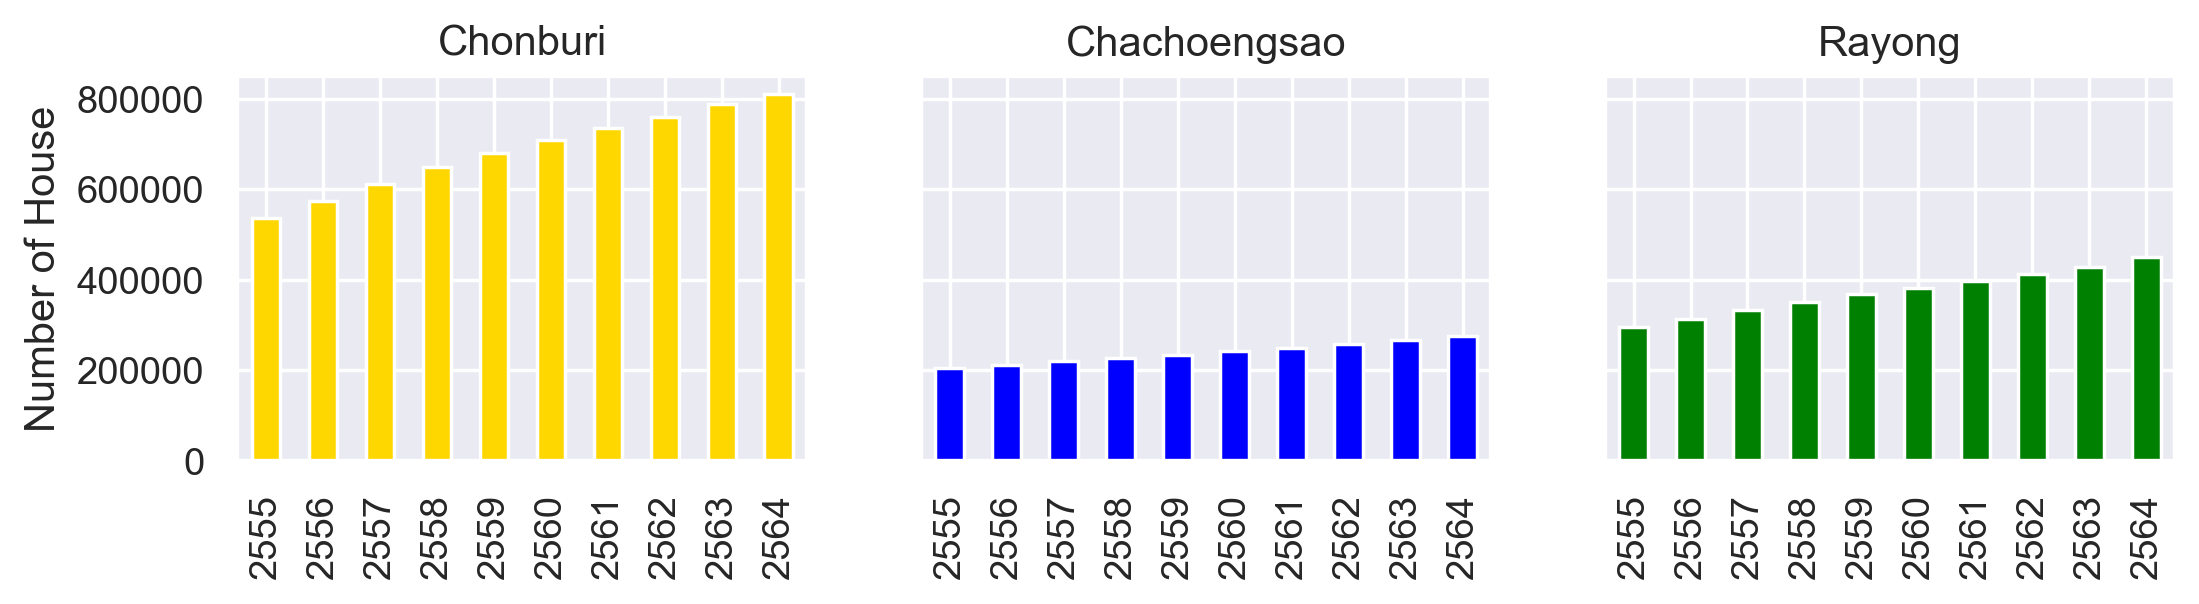

In [267]:
p0 = data_02_01[data_02_01['Region'].str.match('ภาค', case = False)]
p0 = p0[p0['จังหวัด'].str.match('ภาค', case = False)]
p0 = p0[p0['ประเภทผู้ใช้'].str.match('จำนวนผู้ใช้ไฟฟ้า', case = False)]
p0.drop(['จังหวัด', 'จำนวนผู้ใช้และการจำหน่าย', 'ประเภทผู้ใช้'], axis = 1, inplace = True)
#display(p0)

#p0.columns = p0.columns.str.replace('ภาค', 'Region')

p0 = p0.groupby('Region').sum().T
p0.columns = p0.columns.str.replace('ภาคกลาง', 'Central')
p0.columns = p0.columns.str.replace('ภาคตะวันออกเฉียงเหนือ', 'Northeast')
p0.columns = p0.columns.str.replace('ภาคเหนือ', 'North')
p0.columns = p0.columns.str.replace('ภาคใต้', 'South')
p0 = pd.DataFrame(p0)
#p0 = p0.set_index(['Region'])
display(p0)

reg_name = ['Central', 'Northeast',	'North', 'South']
reg_volume = np.array([10.248225, 7.029429, 4.455876, 3.361232])
df_reg = pd.DataFrame(reg_name, columns= ['Region'])
df_reg['volume'] = reg_volume
df_reg.sort_values('volume', inplace = True)
#display(df_reg)
plt.barh(df_reg['Region'], df_reg['volume'])
plt.legend('')          # Add legend to the graph
plt.xlabel("Number of House (Million)")                  # Add x-labels
plt.title("Electricity Consumer in 2564 by Region")

p1 = data_02_01[data_02_01['Region'].str.match('ภาค', case = False)]
p1 = p1[p1['ประเภทผู้ใช้'].str.match('จำนวนผู้ใช้ไฟฟ้า', case = False)]
p1 = p1[p1['จังหวัด'].isin(['ชลบุรี','ฉะเชิงเทรา', 'ระยอง'])]
p1.rename(columns = {"จังหวัด":"Year"}, inplace = True)
p1.drop(['Region', 'จำนวนผู้ใช้และการจำหน่าย', 'ประเภทผู้ใช้'], axis = 1, inplace = True)

p1 = p1.set_index('Year').T
p1.rename(columns = {'ชลบุรี':'Chonburi', 'ฉะเชิงเทรา':'Chachoengsao', 'ระยอง':'Rayong'}, inplace = True)
display(p1)

fig, ax = plt.subplots(1,3, sharex = True, sharey = True, figsize = (10,2)) #grap2

Year = []
for i in range(2555,2565):
    Year.append(str(i))

p1.loc[Year, 'Chonburi'].plot(kind = 'bar', color = 'gold', ax = ax[0], title = 'Chonburi', ylabel='Number of House')
p1.loc[Year, 'Chachoengsao'].plot(kind = 'bar', color = 'blue', ax = ax[1], title = 'Chachoengsao')
p1.loc[Year, 'Rayong'].plot(kind = 'bar', color = 'green', ax = ax[2], title = 'Rayong')



In [10]:
#dataset 03
data_03_01 = pd.read_csv('03_GreenEnergy_01.csv')
data_03_02 = pd.read_csv('03_GreenEnergy_02.csv')
#data_03_01.info()
#data_03_02.info()
data_03_01.คู่ค้าทางธุรกิจ = data_03_01.คู่ค้าทางธุรกิจ.astype('str')
data_03_01.บัญชีผู้ผลิตไฟฟ้า = data_03_01.บัญชีผู้ผลิตไฟฟ้า.astype('str')
data_03_01.บัญชีผู้ใช้ไฟฟ้า = data_03_01.บัญชีผู้ใช้ไฟฟ้า.astype('object')
data_03_01.VENDOR = data_03_01.VENDOR.astype('str')
data_03_01.year = data_03_01.year.astype('str')
#display(data_03_01)

pdcer = pd.DataFrame()
pdcer['Year'] = list(range(2550, 2565))

def count_type(year, type):
    x = data_03_01.loc[data_03_01['year'] == str(year)].loc[data_03_01['Code_Fuel_Type'] == str(type)]['Code_Fuel_Type'].count()
    return x

pdcer['Garbage']    = pdcer.apply(lambda x: count_type(x['Year'], 'gb'), axis = 1 )
pdcer['Biogas']     = pdcer.apply(lambda x: count_type(x['Year'], 'bg'), axis = 1 )
pdcer['Biomas']     = pdcer.apply(lambda x: count_type(x['Year'], 'bm'), axis = 1 )
pdcer['Solar']      = pdcer.apply(lambda x: count_type(x['Year'], 'sl'), axis = 1 )
#display(pdcer)

#pdcer_v = pd.DataFrame()
#pdcer_v['Year'] = list(range(2550, 2565))

def sum_volume(year, type):
    x = data_03_01.loc[data_03_01['year'] == str(year)].loc[data_03_01['Code_Fuel_Type'] == str(type)]['ปริมาณเสนอขาย(MW)'].sum()
    return x
#print(sum_volume(2555, 'bg'))

#pdcer_v['Garbage']  = pdcer_v.apply(lambda x: sum_volume(x['Year'], 'gb'), axis = 1 )
#pdcer_v['Biogas']   = pdcer_v.apply(lambda x: sum_volume(x['Year'], 'bg'), axis = 1 )
#pdcer_v['Biomas']   = pdcer_v.apply(lambda x: sum_volume(x['Year'], 'bm'), axis = 1 )
#pdcer_v['Solar']    = pdcer_v.apply(lambda x: sum_volume(x['Year'], 'sl'), axis = 1 )
#display(pdcer_v)

Code_Fuel_Type,bg,bm,gb,sl
year,,,,
2550,1,3,0,3
2551,2,3,0,3
2552,3,4,0,4
2553,4,4,0,13
2554,5,4,0,13
2555,6,4,0,13
2556,7,4,0,77
2557,7,5,0,77
2558,7,6,0,422


Code_Fuel_Type,bg,bm,gb,sl
year,,,,
2550,2.000,11.4,0.0,1.3054
2551,3.850,11.4,0.0,1.3054
2552,4.850,19.4,0.0,9.3054
2553,5.000,19.4,0.0,34.9154
2554,7.400,19.4,0.0,34.9154
2555,11.465,19.4,0.0,34.9154
2556,12.465,19.4,0.0,41.6135
2557,12.465,23.4,0.0,41.6135
2558,12.465,31.4,0.0,50.2300


<AxesSubplot:title={'center':'Volume of Green Energy'}, xlabel='year', ylabel='(MW)'>

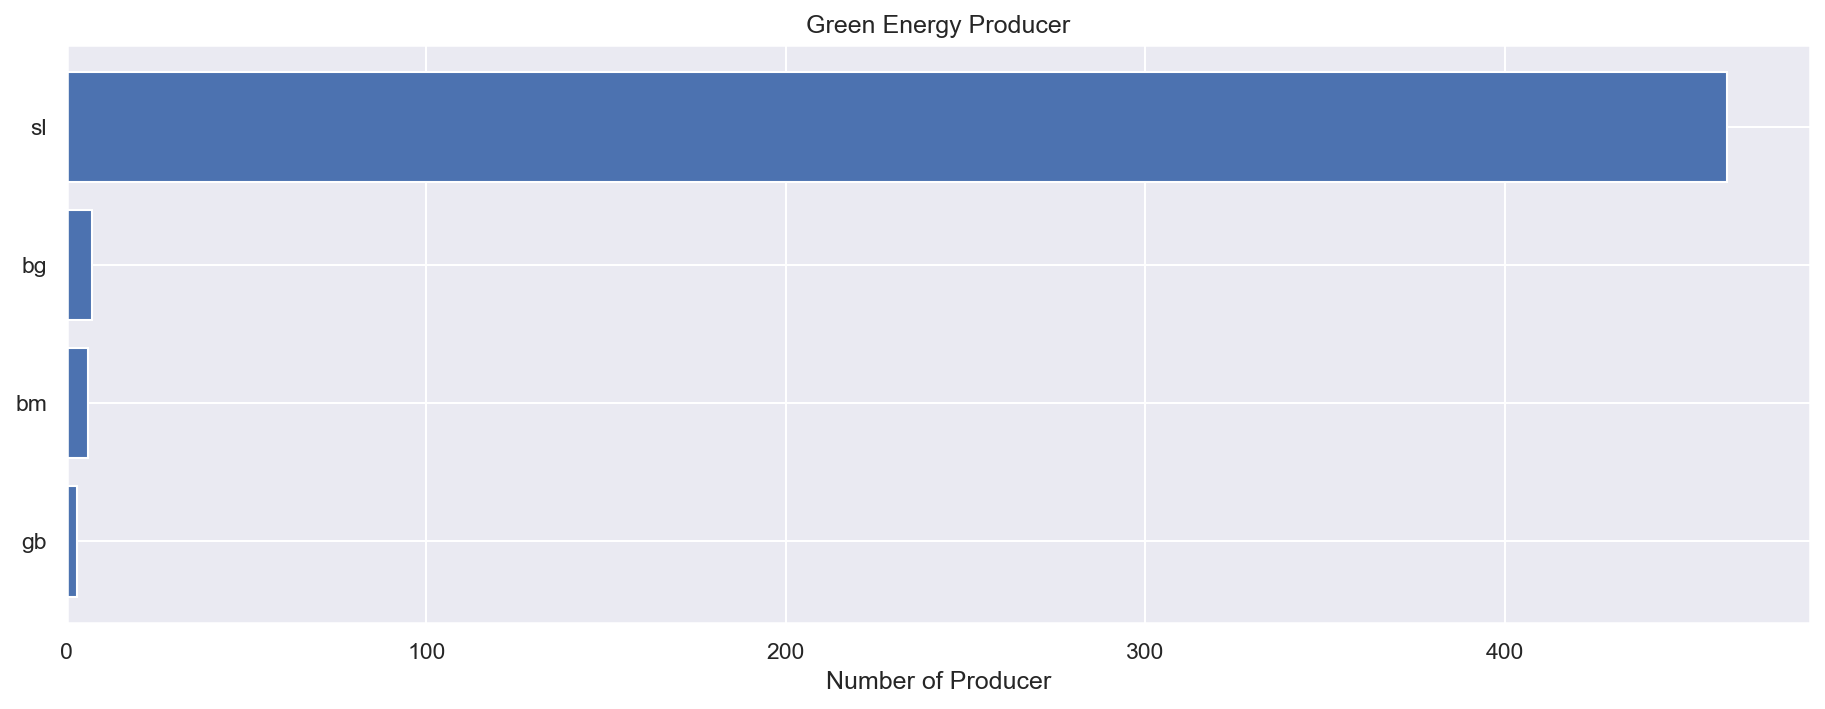

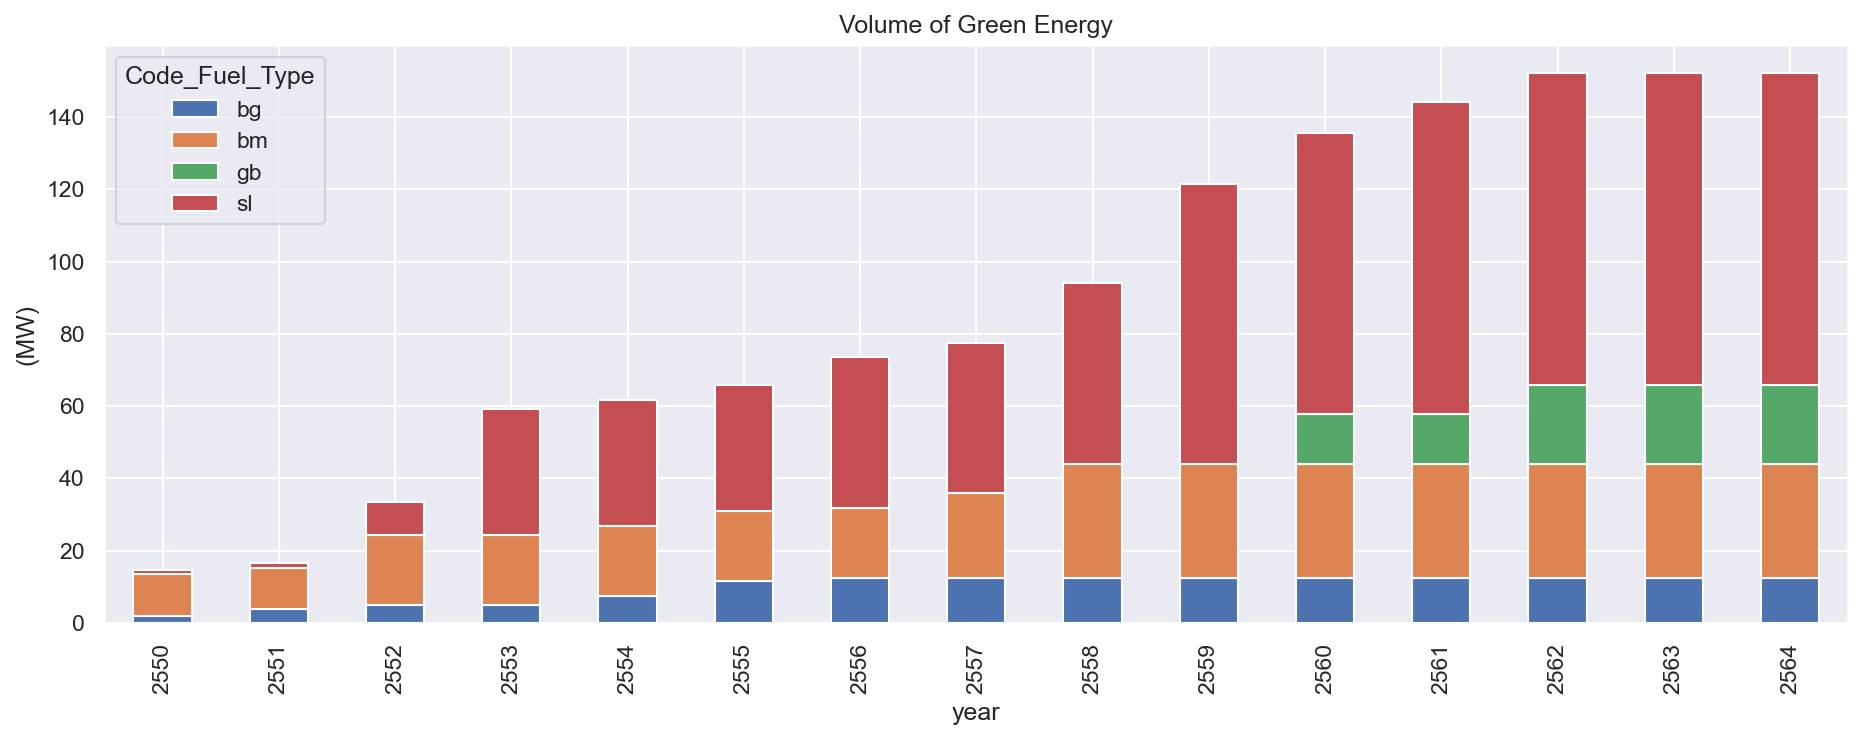

In [260]:
pvt = data_03_01.pivot_table(index = ['year'], columns = ['Code_Fuel_Type'], values = ['VENDOR'], aggfunc = 'count',fill_value = 0)
#display(pvt)
prod = pvt['VENDOR']
prod = prod[['bg','bm', 'gb', 'sl']].cumsum()
display(prod)
#prod.plot.bar()

plt.figure(figsize=(15,5),dpi=150)
reg_name = ['bg', 'bm',	'gb', 'sl']
reg_volume = np.array([7, 6, 3, 462])
df_reg = pd.DataFrame(reg_name, columns= ['Region'])
df_reg['volume'] = reg_volume
df_reg.sort_values('volume', inplace = True)
#display(df_reg)
plt.barh(df_reg['Region'], df_reg['volume'])
plt.title('Green Energy Producer')
plt.xlabel("Number of Producer")                  # Add x-labels
plt.ylabel("")

pvt = data_03_01.pivot_table(index = ['year'], columns = ['Code_Fuel_Type'], values = ['ปริมาณเสนอขาย(MW)'], aggfunc = 'sum',fill_value = 0)
volume_mw = pvt['ปริมาณเสนอขาย(MW)']
volume_mw = volume_mw[['bg','bm', 'gb', 'sl']].cumsum()
display(volume_mw)

plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()
volume_mw.plot(kind = 'bar', stacked =True, ax=ax,
                        title='Volume of Green Energy', ylabel='(MW)')


Code_Fuel_Type,bg,bm,gb,sl
year,,,,
2550,2.000,11.4,0.0,1.3054
2551,3.850,11.4,0.0,1.3054
2552,4.850,19.4,0.0,9.3054
2553,5.000,19.4,0.0,34.9154
2554,7.400,19.4,0.0,34.9154
2555,11.465,19.4,0.0,34.9154
2556,12.465,19.4,0.0,41.6135
2557,12.465,23.4,0.0,41.6135
2558,12.465,31.4,0.0,50.2300


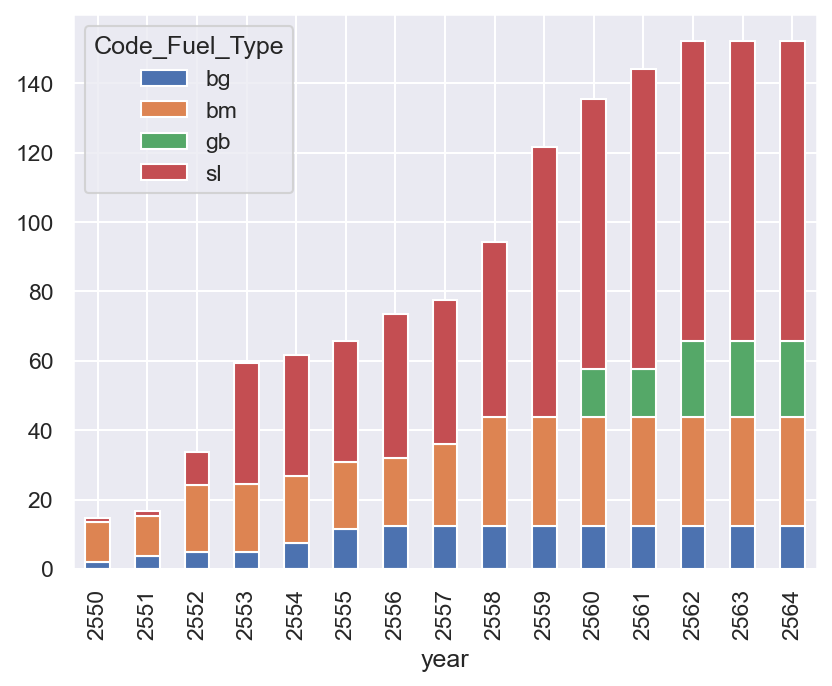

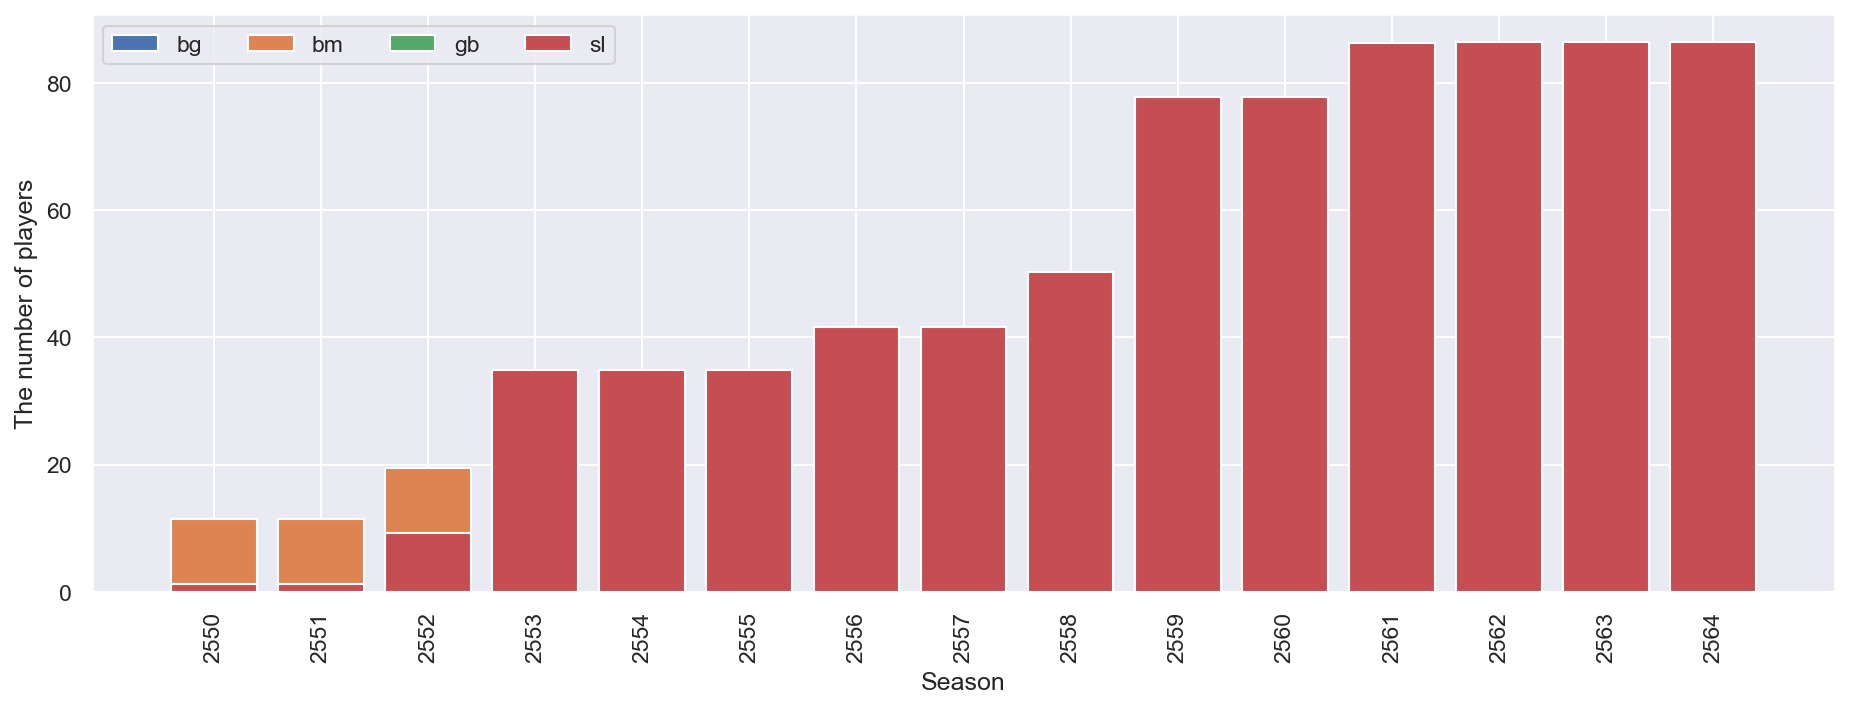

In [216]:
pvt = data_03_01.pivot_table(index = ['year'], columns = ['Code_Fuel_Type'], values = ['ปริมาณเสนอขาย(MW)'], aggfunc = 'sum',fill_value = 0)
volume_mw = pvt['ปริมาณเสนอขาย(MW)']
volume_mw = volume_mw[['bg','bm', 'gb', 'sl']].cumsum()
display(volume_mw)

volume_mw.plot(kind = 'bar', stacked =True)

plt.figure(figsize=(15,5),dpi=150)

# Plot 
plt.bar( x=volume_mw.index,            # season
           height=volume_mw['bg'],  # the number of players
           label='bg' )
plt.bar( x=volume_mw.index,            # season
           height=volume_mw['bm'],  # the number of players
           label='bm' )
plt.bar( x=volume_mw.index,            # season
           height=volume_mw['gb'],  # the number of players
           label='gb' )
plt.bar( x=volume_mw.index,            # season
           height=volume_mw['sl'],  # the number of players
           label='sl' )

# (Optional) Add legend to the graph
plt.legend(loc='upper left',      # Place legend at which location 
           ncol=len(volume_mw.columns))  # How many columns to diplay the legend (default=1)  

# (Optional) Add labels to x and y axes
plt.xlabel("Season")                  
plt.ylabel("The number of players")   

# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=90, horizontalalignment='center' )

,ลำดับ,รหัสการไฟฟ้า,Date,BP,CA,Energy,หมวดอัตรา,Total_Unit,Price,KW_Max,project
0,1,H05104,1.2020,1002408420,82000030004,Solar,VSPP-RN-2,107000,360164,650,adder
1,2,H07101,1.2020,1002258496,82000030013,Solar,VSPP-RN-1,0,0,0,adder
2,3,H08101,1.2020,1001319240,82000030002,Biomas,VSPP-RN-2,729000,2068727,2166,adder
3,4,H08301,1.2020,1001319541,82000030003,Biomas,VSPP-RN-2,1895200,5460196,5432,adder
4,5,H08301,1.2020,1002118923,82000030011,Biogas,VSPP-RN-1,0,0,0,adder
...,...,...,...,...,...,...,...,...,...,...,...
14360,124,H22101,7.2022,1001513530,82000296610,Solar,RTFITRD2,253,557,3,solar 62
14361,125,H22101,7.2022,1001755937,82000293405,Solar,RTFITRD2,152,334,2,solar 62
14362,126,H22101,7.2022,1002103944,82000295271,Solar,RTFITRD2,128,282,2,solar 62
14363,127,H22101,7.2022,1019210371,82000296417,Solar,RTFITRD2,278,612,3,solar 62


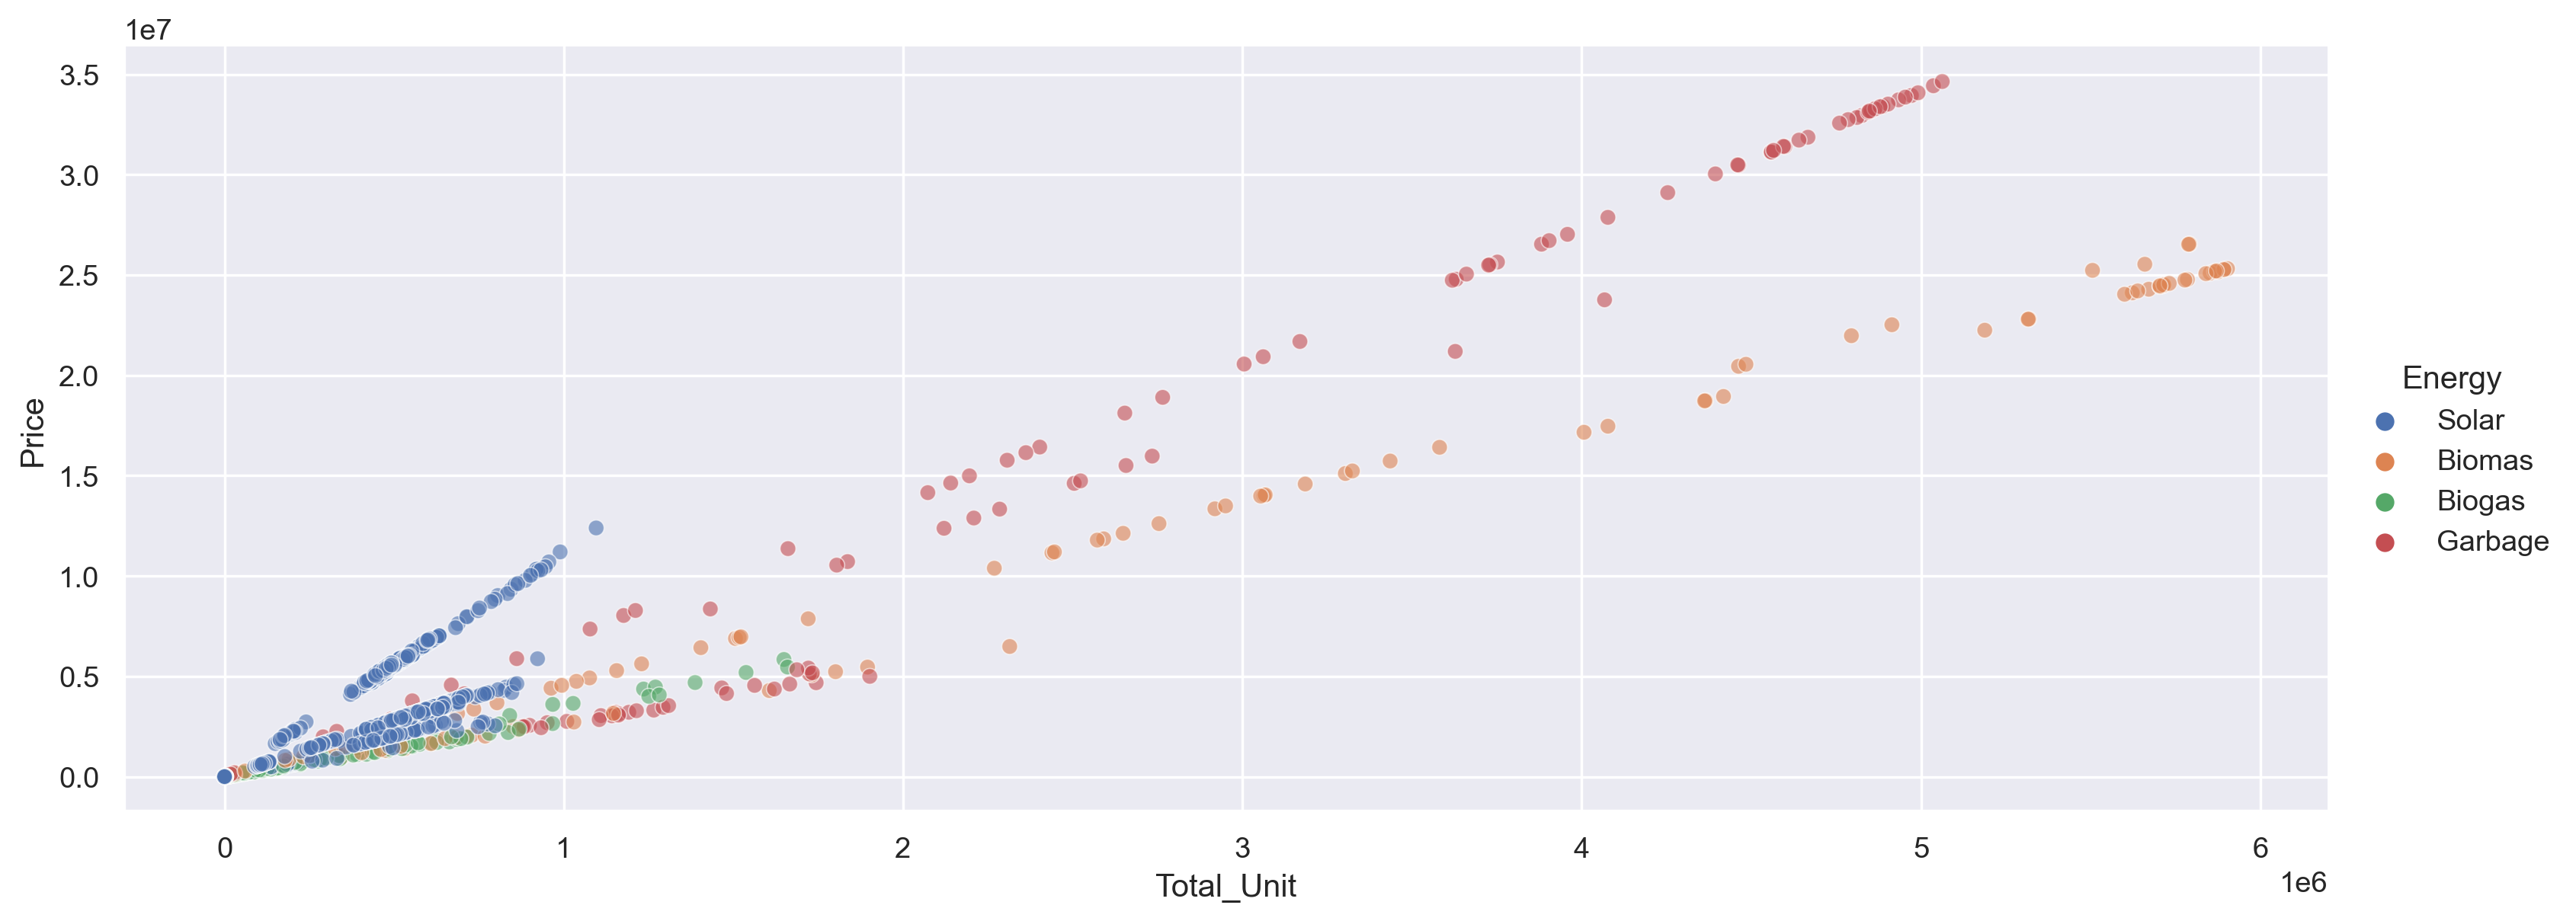

In [279]:
display(data_03_02)
sns.set(rc={'figure.dpi':250})
sns.relplot( kind='scatter',          # default:'scatter'
             data=data_03_02,            # Data to plot
             x='Total_Unit', y='Price', # Positions of x and y axes
             hue='Energy',            # Grouping variable that will produce elements with different colors
             height=5, aspect=2.5,    # Figure size must be set in the figure-level function
             alpha=0.6,
            ) 

In [24]:
#dataset 04

#กราฟแท่ง ค่าไฟไม่รวมFt กับค่า Ft
data_04_01 = pd.read_csv('04_my_home_01.csv')
data_04_01.รหัสอัตรา = data_04_01.รหัสอัตรา.astype('str')
data_04_01.วันที่อ่าน = pd.to_datetime(data_04_01.วันที่อ่าน)
data_04_01.rename(columns = {'วันที่อ่าน': 'Date'}, inplace= True)
data_04_01.rename(columns = {'KWH รวม': 'KWH'}, inplace= True)
data_04_01.rename(columns = {'ค่า FT': 'Ft_Price'}, inplace= True)
data_04_01.rename(columns = {'FT / หน่วย': 'Ft_Rate'}, inplace= True)
data_04_01.rename(columns = {'ค่าไฟฟ้ารวมภาษี': 'Price_Bt'}, inplace= True)
data_04_01.rename(columns = {'เฉลี่ย/หน่วย': 'Price/Unit'}, inplace= True)
data_04_01.set_index('Date', inplace = True)
data_04_01.info()
display(data_04_01)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2015-01-21 to 2023-01-23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   รหัสอัตรา   97 non-null     object 
 1   KWH         97 non-null     int64  
 2   Ft_Price    97 non-null     float64
 3   Ft_Rate     97 non-null     float64
 4   Price_Bt    97 non-null     float64
 5   Price/Unit  97 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.3+ KB


C:\Users\tanat\AppData\Local\Temp\ipykernel_4868\3985174441.py:6: UserWarning: Parsing '21.01.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_04_01.วันที่อ่าน = pd.to_datetime(data_04_01.วันที่อ่าน)
C:\Users\tanat\AppData\Local\Temp\ipykernel_4868\3985174441.py:6: UserWarning: Parsing '18.02.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_04_01.วันที่อ่าน = pd.to_datetime(data_04_01.วันที่อ่าน)
C:\Users\tanat\AppData\Local\Temp\ipykernel_4868\3985174441.py:6: UserWarning: Parsing '21.03.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_04_01.วันที่อ่าน = pd.to_datetime(data_04_01.วันที่อ่าน)
C:\Users\tanat\AppData\Local\Temp\ipykernel_4868\3985174441.py:6: UserWarning: Parsing '20.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data_04_01

,รหัสอัตรา,KWH,Ft_Price,Ft_Rate,Price_Bt,Price/Unit
Date,,,,,,
2015-01-21,1125,333,196.34,0.5896,1426.01,4.28
2015-02-18,1125,353,208.13,0.5896,1518.58,4.30
2015-03-21,1125,435,256.48,0.5896,1905.62,4.38
2015-04-20,1125,404,238.20,0.5896,1755.51,4.35
2015-05-21,1125,435,215.80,0.4961,1862.09,4.28
...,...,...,...,...,...,...
2022-09-22,1125,356,332.61,0.9343,1731.04,4.86
2022-10-23,1125,339,316.73,0.9343,1568.14,4.63
2022-11-22,1125,347,324.20,0.9343,1607.86,4.63


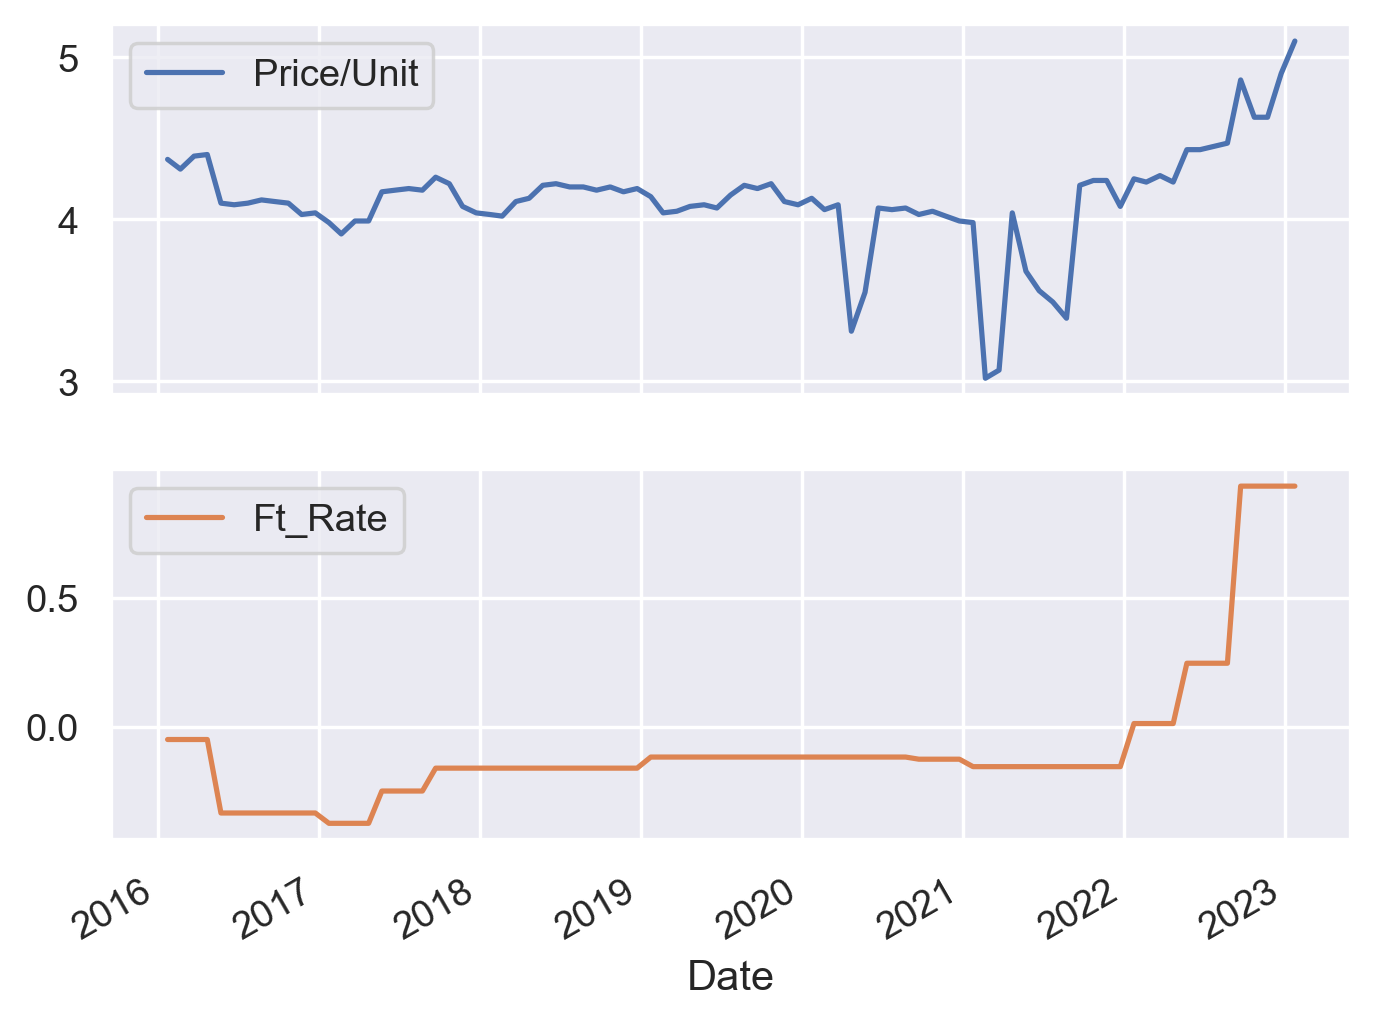

In [270]:
data_04_01[['Price/Unit', 'Ft_Rate']].loc['2016':'2023'].plot(subplots= True, grid = True)
#plt.ylabel('Bath/Unit');
plt.show()

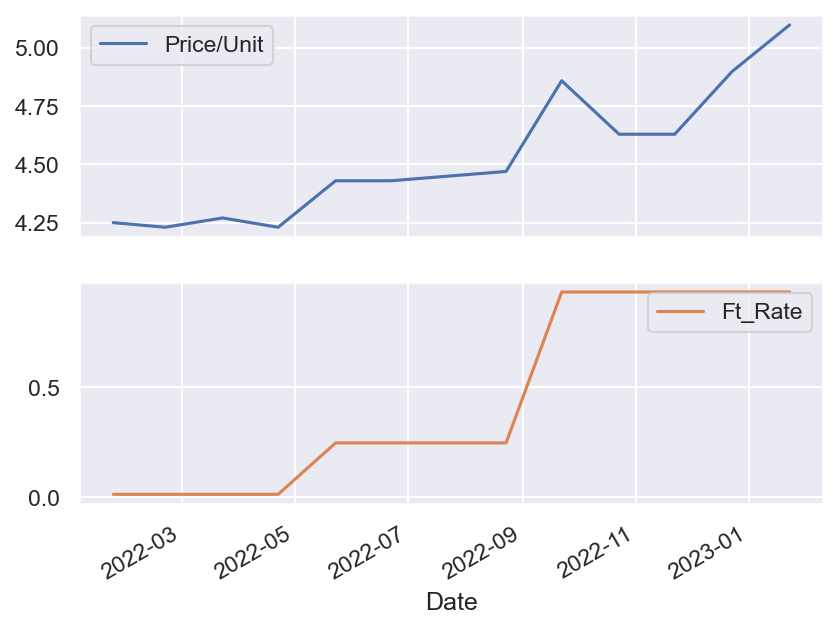

In [17]:
data_04_01[['Price/Unit', 'Ft_Rate']].loc['2022':'2023'].plot(subplots= True, grid = True)
#plt.ylabel('Bath/Unit');
plt.show()

In [280]:
#Investment #ความคุ้มค่าด้านการลงทุน NPV IRR

#display(data_04_01['Price/Unit'][84:96]) 
power = 5
use = round(data_04_01['KWH'][84:96].mean()/30/4.2/0.7,2) 
price_h = round(data_04_01['Price/Unit'][84:96].mean(),2) #
price_s = 2.20
y0 = -200000
yn = (use*4.2*365*price_h)+((power-use)*4.2*365*price_s)
age_s = 20

cashflows = [y0]

for i in range(1,(age_s)+1):
    cashflows.append(yn)
#print(cashflows)
rate = 0.05

npv_sl = npf.npv(rate, cashflows)
irr_sl = npf.irr(cashflows)

def dpp(rate, cash_flows=list()):
    #from pandas import Series, DataFrame
    cf_df = pd.DataFrame(cash_flows, columns=['UndiscountedCashFlows'])
    cf_df.index.name = 'Year'
    cf_df['DiscountedCashFlows'] = npf.pv(rate=rate, pmt=0, nper=cf_df.index, fv=-cf_df['UndiscountedCashFlows'])
    cf_df['CumulativeDiscountedCashFlows'] = np.cumsum(cf_df['DiscountedCashFlows'])
    final_full_year = cf_df[cf_df.CumulativeDiscountedCashFlows < 0].index.values.max()
    fractional_yr = -cf_df.CumulativeDiscountedCashFlows[final_full_year ]/cf_df.DiscountedCashFlows[final_full_year + 1]
    payback_period = final_full_year + fractional_yr
    return payback_period
dpp_sl = dpp(rate, cashflows)

#print(npv_sl, irr_sl, dpp_sl)

from tabulate import tabulate

head = ['Parameter', 'Quantity', 'Unit']
data = [('Consumption', use, 'Kw/Day'),
        ('Capacity', power, 'Kw/Day'),
        ('Elec Price of House', price_h, 'Baht/KwH'),
        ('Elec Price of Solar', price_s, 'Baht/KwH'),
        ('Age of Solar Panel', age_s, 'Year'),
        ('', '', ''),
        ('Cost', cashflows[0], 'Baht'),
        ('Benefit', round(cashflows[1],2), 'Baht/Year'),
        ('Inflation Rate', rate*100, '%'),
        ('', '', ''),
        ('NPV', round(npv_sl, 2), 'Baht'),
        ('IRR', round(irr_sl*100, 2), '%'),
        ('Payback Period', round(dpp_sl, 2), 'Year')]
print(tabulate(data, head, tablefmt = 'psql', floatfmt = ',.0f', numalign = 'right'))

+---------------------+------------+-----------+
| Parameter           | Quantity   | Unit      |
|---------------------+------------+-----------|
| Consumption         | 4.15       | Kw/Day    |
| Capacity            | 5          | Kw/Day    |
| Elec Price of House | 4.48       | Baht/KwH  |
| Elec Price of Solar | 2.2        | Baht/KwH  |
| Age of Solar Panel  | 20         | Year      |
|                     |            |           |
| Cost                | -200000    | Baht      |
| Benefit             | 31368.25   | Baht/Year |
| Inflation Rate      | 5.0        | %         |
|                     |            |           |
| NPV                 | 190917.68  | Baht      |
| IRR                 | 14.67      | %         |
| Payback Period      | 7.87       | Year      |
+---------------------+------------+-----------+
